# 01. Importing libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

# 02. Importing data

In [2]:
# Python shortcut - reusable path
path = r'C:\Users\thoma\OneDrive\Dokumente\data analytics\Data Project 4\06-2025 Instacart Basket Analysis'

In [3]:
path

'C:\\Users\\thoma\\OneDrive\\Dokumente\\data analytics\\Data Project 4\\06-2025 Instacart Basket Analysis'

In [4]:
df_ords_prods_merge = pd.read_pickle(os.path.join(path, 'Data','Prepared Data', 'Pr_ords_prods_merge_4.8(1).pkl'))

In [5]:
df_ords_prods_merge.shape

(30356957, 19)

In [6]:
df_ords_prods_merge.columns

Index(['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'product_id', 'add_to_cart_order',
       'reordered', '_merge1', 'product_name', 'aisle_id', 'department_id',
       'prices', '_merge', 'Busiest days', 'busiest_period_of_day',
       'max_order', 'loyalty_flag'],
      dtype='object')

In [7]:
# Question 5. - use the loyalty flag and check the basic statistics of the product prices for each loyalty category (Loyal Customer, Regular Customer and New Customer);
# Do prices of products purchased by loyal customers differ from those purchased by regular or new customers ?
df_ords_prods_merge.groupby('loyalty_flag').agg({'prices': ['mean', 'min', 'max']})

prices              
                       mean  min      max
loyalty_flag                             
Loyal customer    10.402162  1.0  99999.0
New customer      13.396333  1.0  99999.0
Regular customer  12.546842  1.0  99999.0

# The mean of the loyal customers apparently differs from the mean of the other two customer groups. Loyal customer seem to pay less on average.

In [8]:
df_ords_prods_merge.groupby('loyalty_flag').agg({'prices': ['mean']})

,prices
,mean
loyalty_flag,
Loyal customer,10.402162
New customer,13.396333
Regular customer,12.546842


In [9]:
# Question 6. - creating a spending flag for each user based on the average price across all their orders
# Creating a new column 'average_price' with the average price values grouped by 'user_id'
df_ords_prods_merge['average_price'] = df_ords_prods_merge.groupby(['user_id'])['prices'].transform(np.mean)

C:\Users\thoma\AppData\Local\Temp\ipykernel_25920\1898374910.py:3: FutureWarning: The provided callable <function mean at 0x000001B7ECBFFA60> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df_ords_prods_merge['average_price'] = df_ords_prods_merge.groupby(['user_id'])['prices'].transform(np.mean)


In [10]:
df_ords_prods_merge["prices"].value_counts(dropna = False)

prices
12.3    584654
10.3    482559
4.0     420813
6.3     407141
1.3     399241
         ...  
20.2       116
22.7        90
21.5        80
18.3        10
21.0         8
Name: count, Length: 243, dtype: int64

In [11]:
# Assigning new string values
result3 = []

for value in df_ords_prods_merge["prices"]:
  if value < 10:
    result3.append("Low spender")
  elif value > 10:
    result3.append("High spender")
  else:
    result3.append("No spending")

In [12]:
# Merging 'average_price' with the result3 values
df_ords_prods_merge["average_price"] = result3

In [13]:
result3

['Low spender',
 'Low spender',
 'Low spender',
 'Low spender',
 'Low spender',
 'Low spender',
 'Low spender',
 'Low spender',
 'Low spender',
 'Low spender',
 'Low spender',
 'Low spender',
 'Low spender',
 'Low spender',
 'Low spender',
 'Low spender',
 'Low spender',
 'Low spender',
 'Low spender',
 'Low spender',
 'Low spender',
 'Low spender',
 'Low spender',
 'Low spender',
 'Low spender',
 'Low spender',
 'Low spender',
 'Low spender',
 'Low spender',
 'Low spender',
 'Low spender',
 'Low spender',
 'Low spender',
 'Low spender',
 'Low spender',
 'Low spender',
 'Low spender',
 'Low spender',
 'Low spender',
 'Low spender',
 'Low spender',
 'Low spender',
 'Low spender',
 'Low spender',
 'Low spender',
 'Low spender',
 'Low spender',
 'Low spender',
 'Low spender',
 'Low spender',
 'Low spender',
 'Low spender',
 'Low spender',
 'Low spender',
 'Low spender',
 'Low spender',
 'Low spender',
 'Low spender',
 'Low spender',
 'Low spender',
 'Low spender',
 'Low spender',
 'Low sp

In [14]:
# Frequency check
df_ords_prods_merge["average_price"].value_counts(dropna = False)

average_price
Low spender     20363685
High spender     9845461
No spending       147811
Name: count, dtype: int64

# Most customers are low spenders 

In [15]:
# Question 7. - creating an order frequency flag that marks the regularity of a user’s ordering behavior according to the median in the “days_since_prior_order” column
# Creating a new column 'order_frequency' with the median days since prior order grouped by 'user_id'
df_ords_prods_merge['order_frequency'] = df_ords_prods_merge.groupby(['user_id'])['days_since_prior_order'].transform(np.median)

C:\Users\thoma\AppData\Local\Temp\ipykernel_25920\518008762.py:3: FutureWarning: The provided callable <function median at 0x000001B7ECD32CA0> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df_ords_prods_merge['order_frequency'] = df_ords_prods_merge.groupby(['user_id'])['days_since_prior_order'].transform(np.median)


In [16]:
df_ords_prods_merge['days_since_prior_order'].value_counts(dropna = False)

days_since_prior_order
7.0     3479570
30.0    3070153
6.0     2519972
5.0     2126447
4.0     2080575
8.0     1933845
3.0     1877896
2.0     1464883
9.0     1218991
14.0    1030632
10.0     968172
1.0      941130
13.0     851898
11.0     821531
12.0     774882
15.0     672100
16.0     461810
0.0      448700
21.0     444570
17.0     382472
20.0     380090
18.0     350914
19.0     335172
22.0     309120
28.0     253358
23.0     226035
27.0     204257
24.0     193595
25.0     180586
26.0     177955
29.0     175646
Name: count, dtype: int64

In [17]:
# Creating the new column 'order_frequency' with the median days since prior order grouped by 'user_id'
df_ords_prods_merge['order_frequency'] = df_ords_prods_merge.groupby(['user_id'])["days_since_prior_order"].transform(np.median)

C:\Users\thoma\AppData\Local\Temp\ipykernel_25920\1586492066.py:2: FutureWarning: The provided callable <function median at 0x000001B7ECD32CA0> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df_ords_prods_merge['order_frequency'] = df_ords_prods_merge.groupby(['user_id'])["days_since_prior_order"].transform(np.median)


In [18]:
# Assigning the new string values
result4 = []

for value in df_ords_prods_merge["days_since_prior_order"]:
    if value > 20:
        result4.append("Non-frequent customer")
    elif 10 < value <= 20:
        result4.append("Regular customer")
    elif value <= 10:
        result4.append("Frequent customer")
    else:
        result4.append("No more order")

In [19]:
# Merging 'order_frequency' with the result4 values
df_ords_prods_merge['order_frequency'] = result4

In [20]:
result4

['Frequent customer',
 'Regular customer',
 'Frequent customer',
 'Frequent customer',
 'Non-frequent customer',
 'Non-frequent customer',
 'Non-frequent customer',
 'Regular customer',
 'Regular customer',
 'Frequent customer',
 'Frequent customer',
 'Regular customer',
 'Frequent customer',
 'Frequent customer',
 'Frequent customer',
 'Frequent customer',
 'Frequent customer',
 'Regular customer',
 'Frequent customer',
 'Frequent customer',
 'Non-frequent customer',
 'Frequent customer',
 'Frequent customer',
 'Frequent customer',
 'Frequent customer',
 'Frequent customer',
 'Frequent customer',
 'Frequent customer',
 'Frequent customer',
 'Regular customer',
 'Frequent customer',
 'Frequent customer',
 'Non-frequent customer',
 'Frequent customer',
 'Regular customer',
 'Frequent customer',
 'Non-frequent customer',
 'Non-frequent customer',
 'Frequent customer',
 'Frequent customer',
 'Frequent customer',
 'Non-frequent customer',
 'Frequent customer',
 'Frequent customer',
 'Frequ

In [21]:
# Frequency check
df_ords_prods_merge['order_frequency'].value_counts(dropna = False)

order_frequency
Frequent customer        19060181
Regular customer          6061501
Non-frequent customer     5235275
Name: count, dtype: int64

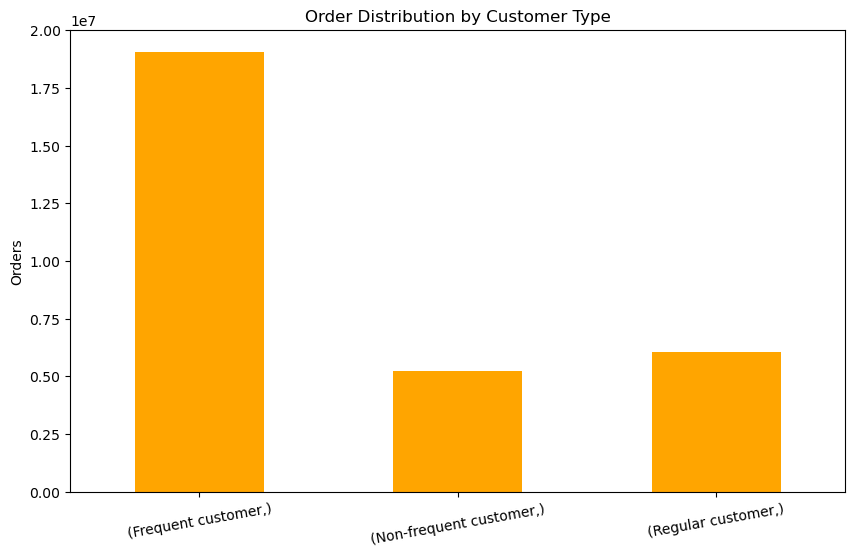

In [22]:
bar = df_ords_prods_merge.value_counts(['order_frequency']).sort_index().plot(kind='bar', figsize=(10,6), title='Order Distribution by Customer Type', color='orange')
bar.set_xlabel('')
bar.set_ylabel('Orders')
plt.xticks(rotation=10)
plt.show()

In [23]:
# Saving
bar.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'bar_order_frequency.png'))

In [24]:
df_ords_prods_merge.shape

(30356957, 21)

In [25]:
df_ords_prods_merge.columns

Index(['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'product_id', 'add_to_cart_order',
       'reordered', '_merge1', 'product_name', 'aisle_id', 'department_id',
       'prices', '_merge', 'Busiest days', 'busiest_period_of_day',
       'max_order', 'loyalty_flag', 'average_price', 'order_frequency'],
      dtype='object')

In [26]:
df_ords_prods_merge.head(15)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge1,...,aisle_id,department_id,prices,_merge,Busiest days,busiest_period_of_day,max_order,loyalty_flag,average_price,order_frequency
0,3139998.0,138.0,28.0,6.0,11.0,3.0,1,5.0,0.0,both,...,61.0,19.0,5.8,both,Regularly busy,Most orders,32.0,Regular customer,Low spender,Frequent customer
1,1977647.0,138.0,30.0,6.0,17.0,20.0,1,1.0,1.0,both,...,61.0,19.0,5.8,both,Regularly busy,Average orders,32.0,Regular customer,Low spender,Regular customer
2,389851.0,709.0,2.0,0.0,21.0,6.0,1,20.0,0.0,both,...,61.0,19.0,5.8,both,Two busiest days,Average orders,5.0,New customer,Low spender,Frequent customer
3,1813452.0,764.0,3.0,4.0,17.0,9.0,1,11.0,1.0,both,...,61.0,19.0,5.8,both,Two slowest days,Average orders,3.0,New customer,Low spender,Frequent customer
4,1701441.0,777.0,16.0,1.0,7.0,26.0,1,7.0,0.0,both,...,61.0,19.0,5.8,both,Two busiest days,Average orders,26.0,Regular customer,Low spender,Non-frequent customer
5,1871483.0,825.0,3.0,2.0,14.0,30.0,1,2.0,0.0,both,...,61.0,19.0,5.8,both,Regularly busy,Most orders,9.0,New customer,Low spender,Non-frequent customer
6,1290456.0,910.0,12.0,3.0,10.0,30.0,1,1.0,0.0,both,...,61.0,19.0,5.8,both,Two slowest days,Most orders,12.0,Regular customer,Low spender,Non-frequent customer
7,369558.0,1052.0,10.0,1.0,20.0,19.0,1,1.0,0.0,both,...,61.0,19.0,5.8,both,Two busiest days,Average orders,20.0,Regular customer,Low spender,Regular customer
8,589712.0,1052.0,15.0,1.0,12.0,15.0,1,2.0,1.0,both,...,61.0,19.0,5.8,both,Two busiest days,Most orders,20.0,Regular customer,Low spender,Regular customer
9,497193.0,1480.0,36.0,3.0,13.0,7.0,1,1.0,0.0,both,...,61.0,19.0,5.8,both,Two slowest days,Most orders,43.0,Loyal customer,Low spender,Frequent customer


In [27]:
df_ords_prods_merge.loc[df_ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [28]:
df_ords_prods_merge['prices'].max()

25.0

In [29]:
df_ords_prods_merge.to_pickle(os.path.join(path, 'Data', 'Prepared Data', 'Pr_ords_prods_merge_cleaned_4.8(2).pkl'))